# **Marketing Campaign for Banking Products**

**Data Descriptio**: 

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). 
 Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. 
 Data: ​https://www.kaggle.com/itsmesunil/bank-loan-modelling/download 
 
 
**Context**: 

The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

**Objective:**

The classification goal is to predict the likelihood of a liability customer buying personal loans. 

**Learning Outcomes:**

● Data Collection and preprocessing.

● Data Exploration and Profiling.

● Formatting data to make it consistent.

● Improving data quality.

● Feature Engineering.

● Splitting data into training and evaluation sets.



**Steps and tasks:** 

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc.
2. Check if you need to clean the data for any of the variables. 
3. EDA: Study the data distribution in each attribute and target variable, share your findings.  

    ● Number of unique in each column. 
    
    ● Number of people with zero mortgage. 
    
    ● Number of people with zero credit card spending per month. 
    
    ● Value counts of all categorical columns. 
   
    ● Univariate and Bivariate analysis. 

4. Apply necessary transformations for the feature variables. 
5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively.
6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans. 
7. Print all the metrics related for evaluating the model performance. 
8. Build various other classification algorithms and compare their performance. 
9. Give a business understanding of your model.

# **1) Importing the required libraries,datasets,checking for statistical summary and null values in the data**

In [1]:
#Importing the standard libraries for data manipulation and analysis
import numpy as np    
import pandas as pd
#Importing the plotting and visualizationlibrary for the mathematical and numerical analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline      
#   %matplotlib inline sets the backend of matplotlib to the inline backend that displays outputs of plotting commands.
import io
import warnings
warnings.filterwarnings("ignore")   #To ignore any warnings


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Uploading the dataset file

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Bank_Personal_Loan_Modelling 1.xlsx to Bank_Personal_Loan_Modelling 1.xlsx
User uploaded file "Bank_Personal_Loan_Modelling 1.xlsx" with length 338349 bytes


**1.1)Loading the data**

In [3]:
# Reading the data
data = pd.read_excel('Bank_Personal_Loan_Modelling 1.xlsx')
display(data)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


The data has been displayed upon which the machine learning steps would be implemented.

**1.2)Let us analyze and study more about the data.**


In [ ]:
data.shape
#shape gives an indication of the shape of the array. i.e.,number of rows and columns.

(5000, 14)

So there are 5000 rows of customers details and 14 attributes or variables.

In [ ]:
print(data.columns)
#To print the names of the variables or the attributes of the given dataset

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


**Attribute Information:**

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?


In [ ]:
data.head()
#Returns the first 5 rows by default .It can also return n number of arrays when defined specifically.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail()
#Returns the last 5 rows by default .It can also return n number of last rows when defined specifically.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.info()
#It returns a concise summary of a dataframe,including index dtypeand column dtypes,non null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data.isnull().any()
#Checking for any missing or null values .

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

No null values are found.


In [4]:
data.isnull().sum()
#Rechecking for any missing or null values .

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No missing or null values exist in this dataset as it is now confirmed.

**1.3)Checking the Summary statistics.**

In [ ]:
data.describe()
#Helps to view the basic statistical details like percentile,mean,standard deviation etc of a data frame.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**INFERENCE**

We now know that:

1) Our data has 5000 rows and 14 attributes,out of which 13 are independent variables whereas 1 variable is dependent,i.e.,Personal Loan(Target variable) that relies on these other 13 variables.

2) Our data is clean i.e. no null values present in the data.

3) Our data is numeric in nature.

4) Experience can not be  a negative  value but the statistical summary table is showing it. So we have to clean this attribute either by replacing the negative values in the Experience column with the median value or to check if it is corelated with any attribute or not.By the application of simple logic,there is a thick chance for age and experience attributes to be corelated ,as greater the age,greater could be the years of experience in any profession.

#**2)Cleaning the data**

In the context of data science and machine learning, data cleaning means filtering and modifying your data such that it is easier to explore, understand, and model. Filtering out the parts you don't want or need so that you don't need to look at or process them.

**Data Cleansing Techniques**

●Remove Irrelevant Values. The first and foremost thing you should do is remove useless pieces of data from your system. 

●Get Rid of Duplicate Values. Duplicates are similar to useless values – You don't need them. 

●Avoid Typos (and similar errors).

●Convert Data Types.

●Take Care of Missing Values

**Checking for duplicate values**

In [5]:
data.drop_duplicates(inplace = True)
#To remove any duplicate values,if any.

**Checking for negative values**

In [6]:
#To check for negative values in Age and experience part.
print(data[data['Age']<0].Age.count())
print(data[data['Experience']<0].Experience.count())

0
52


**Checking the level of correlation among attributes**

In [7]:
data['Experience'].corr(data['Age'])

0.9942148569683321

In [8]:
 #  Use corr() function to find the correlation among the columns in the dataframe using 'Pearson' method. Now use corr() function to find the correlation among the columns.
corr = data.corr(method = 'pearson')
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


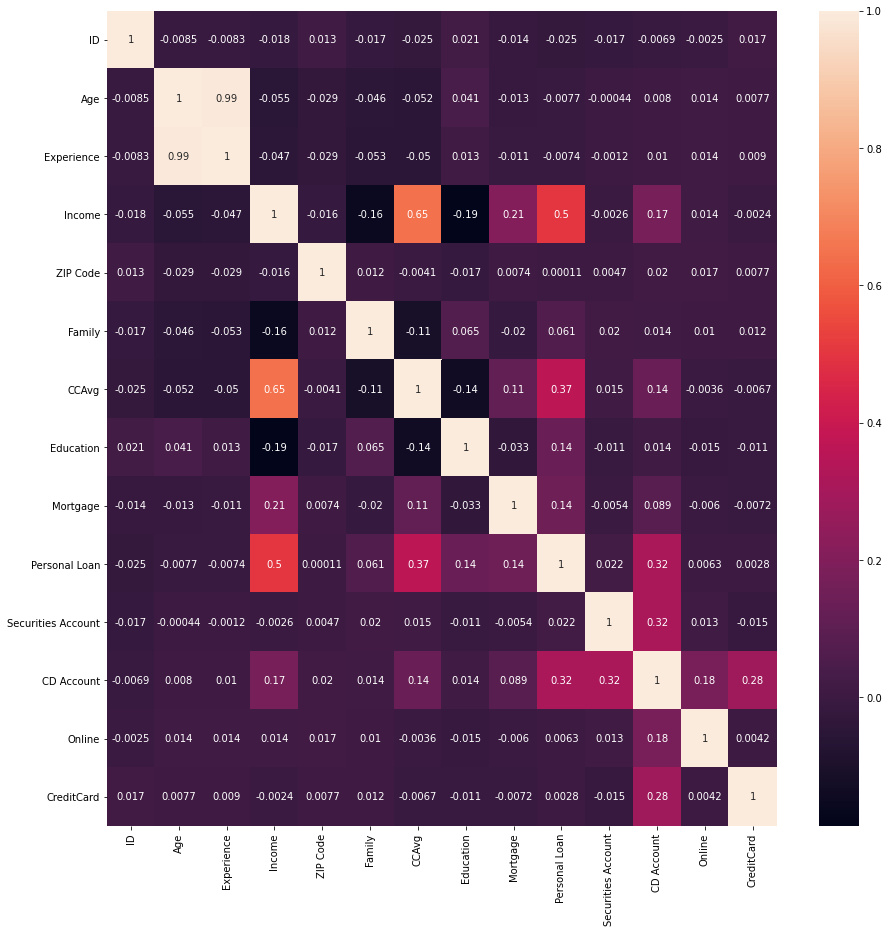

In [ ]:
#Visualizing the above correlation using heatmap.
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = True) 

**INFERENCE**

The output dataframe can be interpreted as for any cell, row variable correlation with the column variable is the value of the cell which implies that the correlation of a variable with itself is 1. For that reason all the diagonal values are 1.00.

The negative values for the corelation between two attributes means that they follow an inverse relationship,whereas positive values tell us about the linearity among two attributes.

Every correlation has two qualities: strength and direction. The direction of a correlation is either positive or negative. In a negative correlation, the variables move in inverse, or opposite, directions. ... When two variables have a positive correlation, it means the variables move in the same direction.

For the model to be stable enough, the above variance should be low. If the variance of the weights is high, it means that the model is very sensitive to data.

Here as we can observe the values of Age and Experience correlation is very high,so we will have to drop/exclude one of its attributes.
The values of CCAvg and Income are also moderately related.



Cleaning or removing the irrelevant unnecessary data like the ID column as it is only an indicator of customer identity and has got nothing to do with the visualization or mathematical modelling of the system.The id of a person will not help our model to reach a conclusion. So we will drop id column. Also, the Experience is highly correlated to Age and it also has some negative values so we will also drop Experience column.We can also drop the ZIP Code column as it has got very less correlation towards the target variable(Personal Loan).

In [9]:
#Dropping the columns of ID,Experience and ZIP Code
data.drop(['ID','Experience','ZIP Code'],axis=1,inplace=True)
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [10]:
#To understand the degree of relationship betweeen the Target variable Personal loan and the remaining variables. 
data.corr().loc['Personal Loan',:].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366891
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Age                  -0.007726
Name: Personal Loan, dtype: float64

**Detecting outliers**

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

The most effective way to find all of your outliers is by using the interquartile range (IQR). The IQR contains the middle bulk of your data, so outliers can be easily found once you know the IQR.

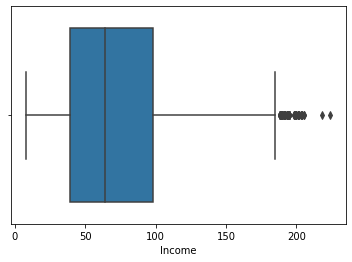

In [ ]:
sns.boxplot(x=data['Income'])

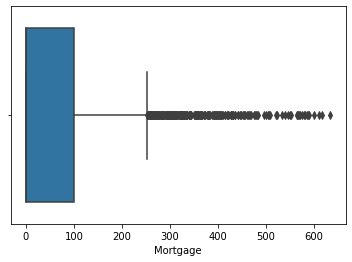

In [ ]:
sns.boxplot(x=data['Mortgage'])

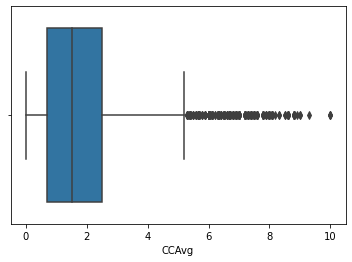

In [ ]:
sns.boxplot(x=data['CCAvg'])

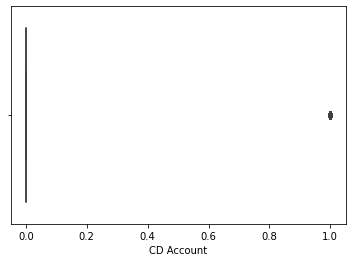

In [ ]:
sns.boxplot(x=data['CD Account'])

Income, CCAvg , Mortgage have Outlier we will deal with this in Feature Engineering

From the pair plot we can see that-

1.Age and Experience both have high correlation which each other.

2.Income,CCAvg,Mortage show positive skewness.

Income, CCAvg , Mortgage have Outlier we will deal with this in Feature Engineering

# **3)EDA**
**To study the data distribution in each attribute and target variable.**

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

**3.1)Number of unique values in each column.**

In [14]:
#To find the number of unique values in each column.
for col in data.columns:
  length = len(data[col].unique())
  print("The unique values in " + str(col) + ":" )
  print(length)

The unique values in Age:
45
The unique values in Income:
162
The unique values in Family:
4
The unique values in CCAvg:
108
The unique values in Education:
3
The unique values in Mortgage:
347
The unique values in Personal Loan:
2
The unique values in Securities Account:
2
The unique values in CD Account:
2
The unique values in Online:
2
The unique values in CreditCard:
2


**3.2)Number of people with zero mortgage.**

In [15]:
#To find the number of people with zero mortgage.
mg = 0
for i in data['Mortgage']:
  if i is 0:
    mg +=1
print("The total number of people having zero mortgage  : " + str(mg))

The total number of people having zero mortgage  : 3462


**3.3)Number of people with zero credit card spending per month**

In [16]:
#To find the number of people with zero credit card spending per month

print("Total number of people with zero credit card spending per month  :")
(data.CCAvg == 0).sum()

Total number of people with zero credit card spending per month  :


106

**3.4)Value counts of all the categorical columns**

In [17]:
data.Family.value_counts()
  
  #value counts of Family categorical field

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [18]:
data.Education.value_counts()
  
  #value counts of Education categorical field

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [19]:
data['Securities Account'].value_counts()
  
  #value counts of Securities Account categorical field

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
data.Online.value_counts()
  
  #value counts of Online categorical field

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
data['CD Account'].value_counts()
  
  #value counts of CD Account categorical field

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
data['CreditCard'].value_counts()
  
  #value counts of Credit Card categorical field

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
data['Personal Loan'].value_counts()
  
  #value counts of Personal Loan categorical field

0    4520
1     480
Name: Personal Loan, dtype: int64

***
Number of customers with only 1 Family member: 1472

Number of customers with 2 Family members: 1296

Number of customers with 3 Family members: 1010

Number of customers with 4 Family members: 1222

***


Number of customers with Education 1 (Undergraduate): 2096

Number of customers having Education 2 (Graduate): 1403

Number of customers having Education 3 (Professionals): 1501

***

4478 customers dont have Securities Account.

522 customers hold Securities Account.

***

2984 customers have Online Internet Banking facility.

2016 customers dont have Online Internet Banking facility.

***

4698 customers dont have a certificate of deposit (CD) account with the bank.

302 customers have a certificate of deposit (CD) account with the bank.

***

3530 customers dont use the credit card issued by the bank.

1470 customers have the credit card from the bank.

***

480 customers out of 5000 had taken a personal loan offered in the last campaign

***



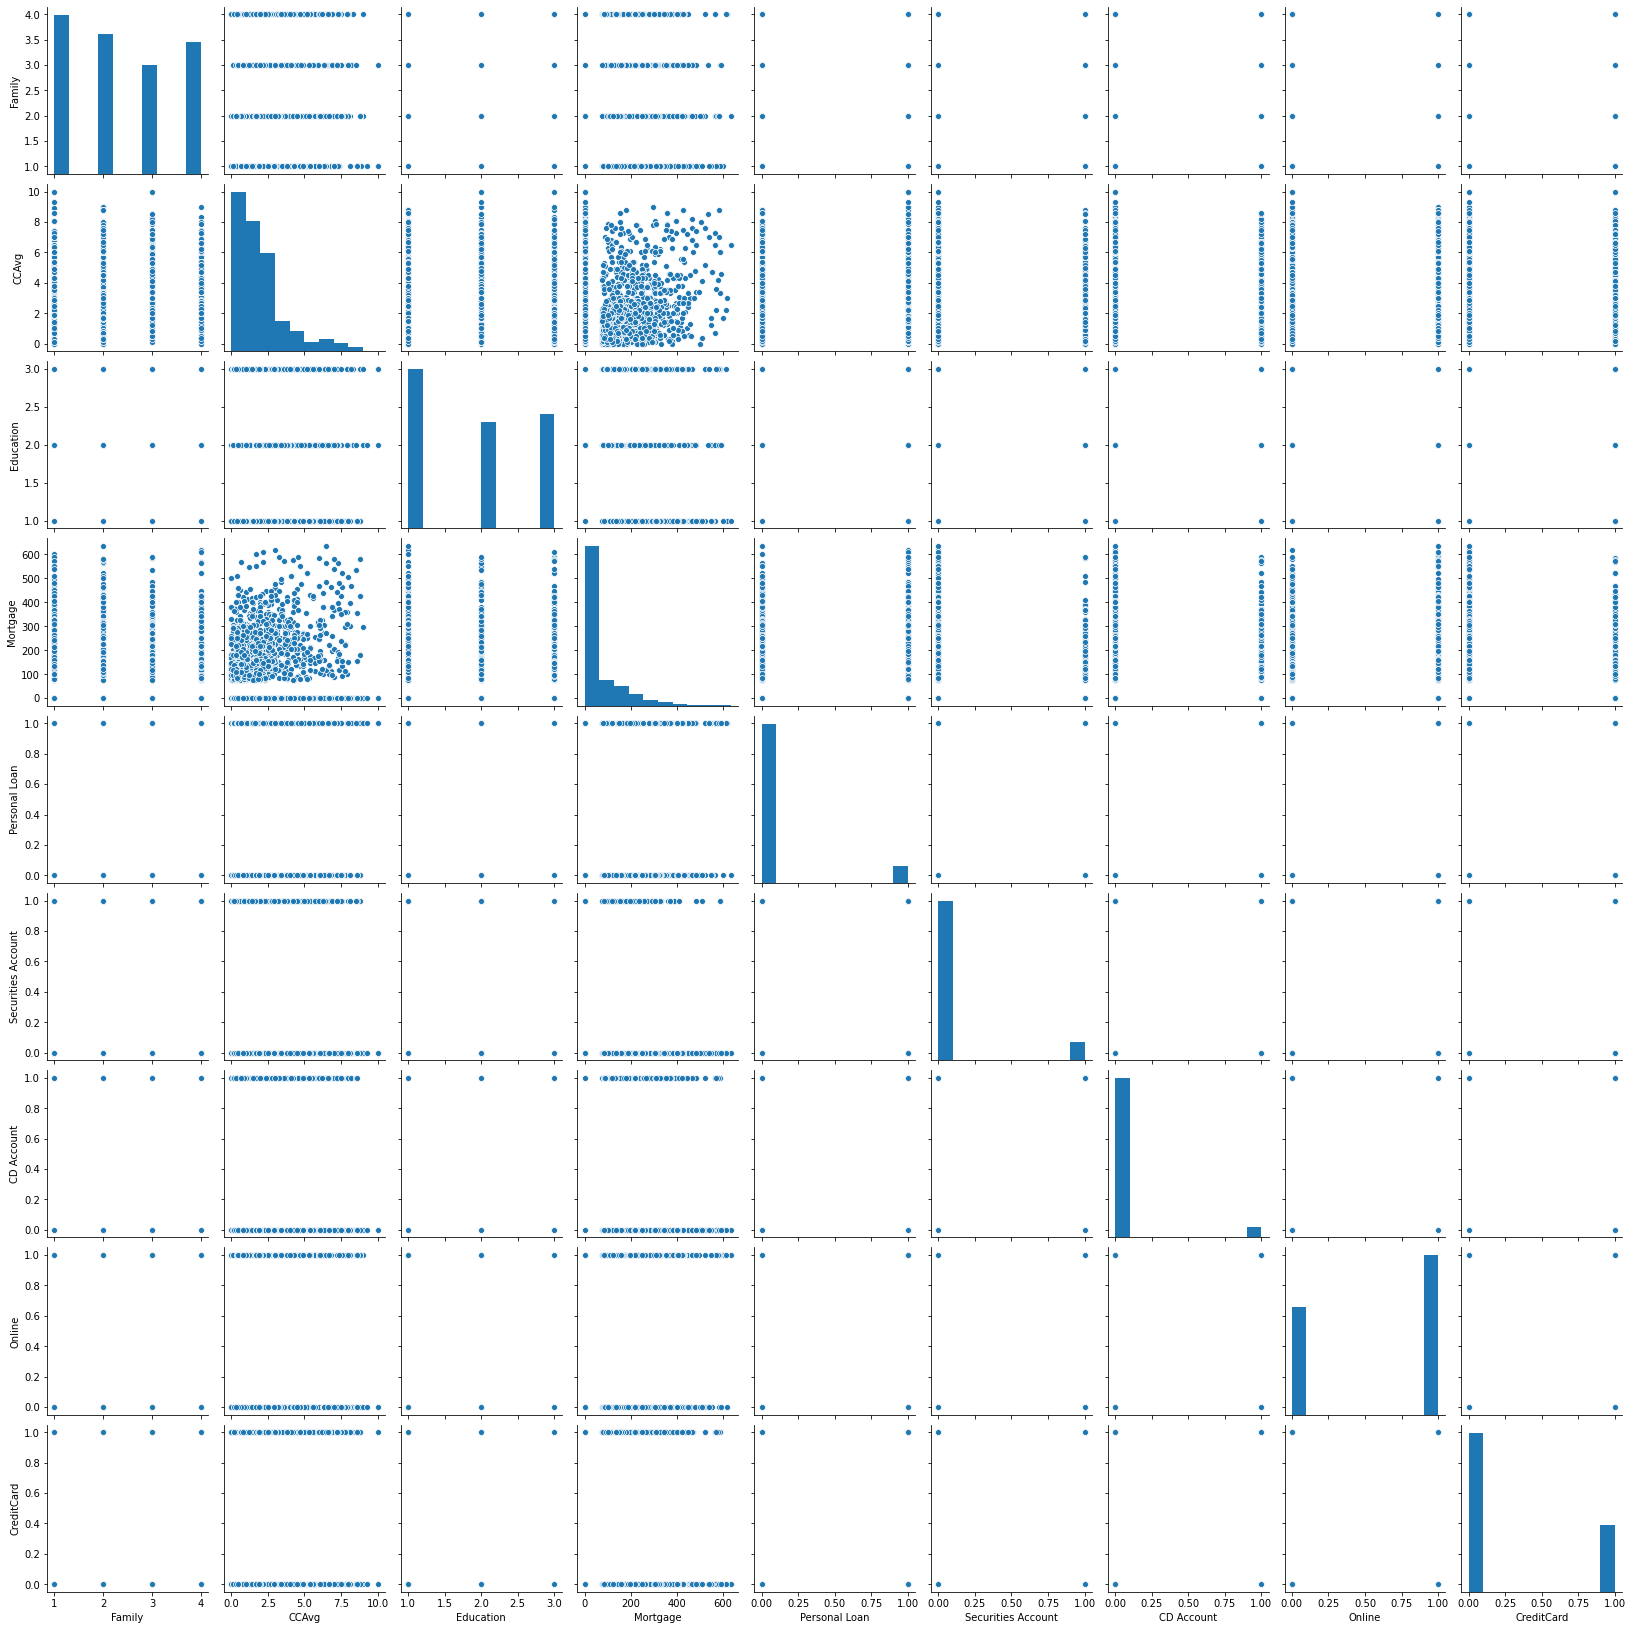

In [ ]:
sns.pairplot(data.iloc[:,2:]);

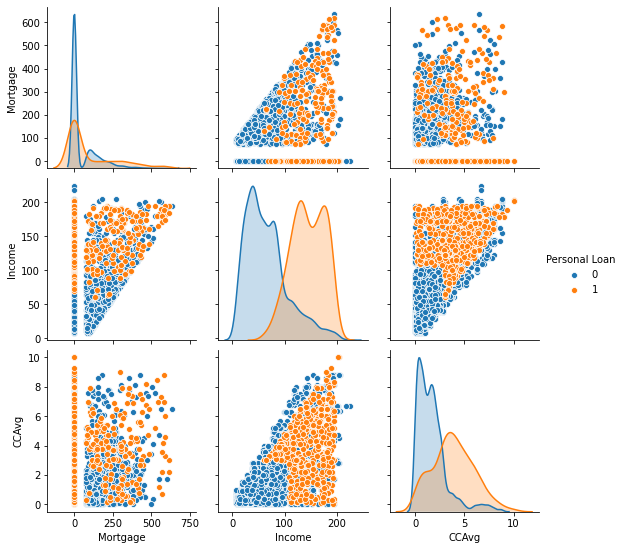

In [ ]:
sns.pairplot(data[['Mortgage','Income','CCAvg','Personal Loan']],hue = 'Personal Loan',kind = 'scatter',diag_kind = 'kde');

**3.5)Univariate analysis**

Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable.The prefix "uni" means one ,emphasizing the fact that analysis only accounts for one variable's effect on a dependent variable.It simply takes the data and gives the summary and associated patterns.

Univariate Analysis
Categorical Variables



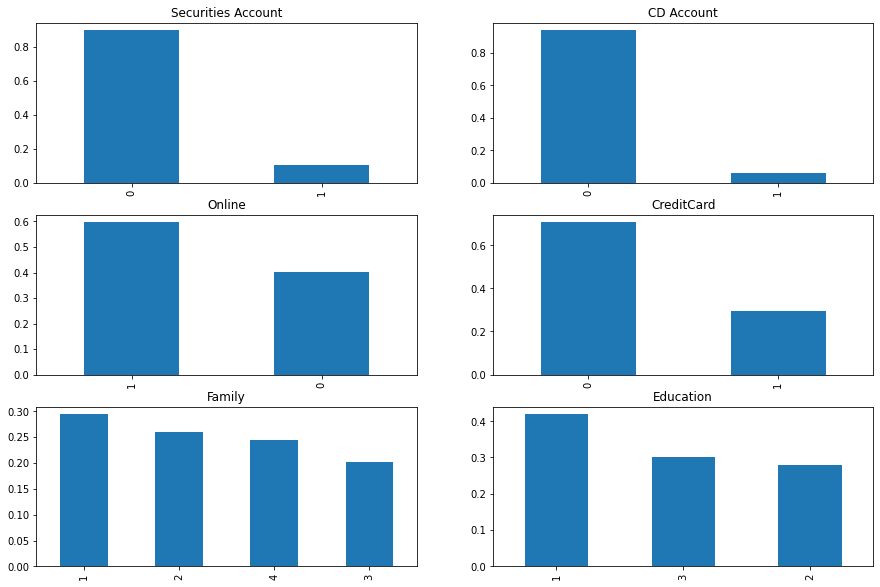

In [20]:
print("Univariate Analysis")
print("Categorical Variables")
print()

plt.figure(figsize=(15,10))  
for i,j in enumerate(['Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family', 'Education']):
    plt.subplot(3,2,i+1) 
    data[j].value_counts(normalize=True).plot.bar(title= j)
plt.show()

Univariate Analysis
Categorical Variables



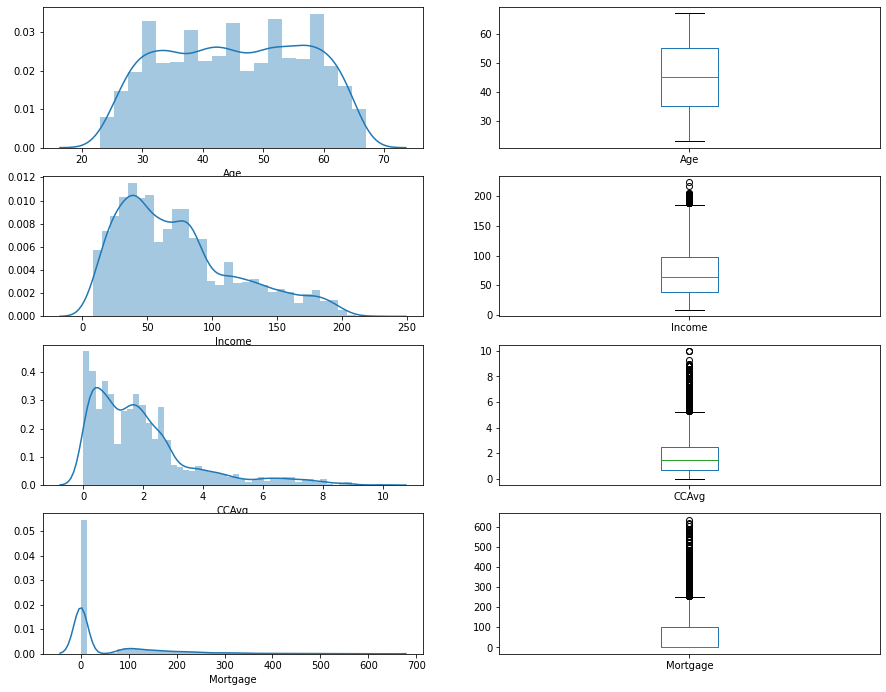

In [21]:
print("Univariate Analysis")
print("Categorical Variables")
print()

plt.figure(figsize=(15,15))  
count = 1
for j in (['Age', 'Income', 'CCAvg', 'Mortgage']):
    plt.subplot(5,2,count) 
    sns.distplot(data[j])
    count+=1
    plt.subplot(5,2,count)
    data[j].plot.box()
    count+=1
plt.show()

**Points from Univariate Analysis**

Age seems to have a symmetrical distribution.

Income is a right skewed distribution(positive skewness).

Credit card average(CCavg) data is positively skewed(right skewed).

The Mortgage is highly skewed and needs to be normalize the curve towards the center by treating its outliers. 

If we look at the plot of CD Account feature, majority customers dont have CD Account.

Similar observation is recorded from the plots of Securities account and Credit card feature variables.

The feature varibles Education and Family are ordinal variables and are evenly distributed.

Income plot shows that the data is positively skewed
From Mortgage plot we visualise that majority customers have less Mortgage, however it is highly skewed.

The plot of Online feature tell's us that majority of the customers have Online Internet Baking facilties, but around 2000 of them have not opted for it.

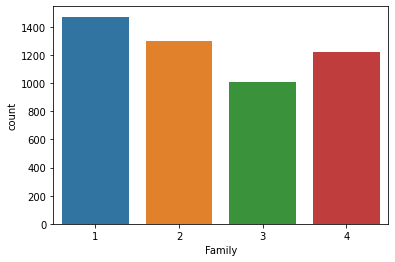

In [22]:
sns.countplot(data.Family);

Family size doesnt have much effect on Personal Loan.From the given plot we can suppose thatfamilies with size 3 are more likely to be be taking loans.

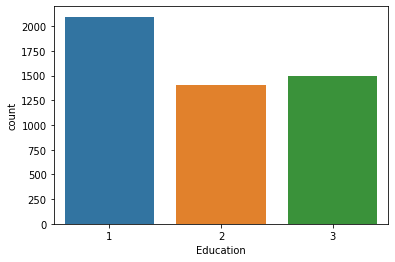

In [23]:
sns.countplot(data.Education);

More number of undergraduates than graduates andadvanced or professional customers.

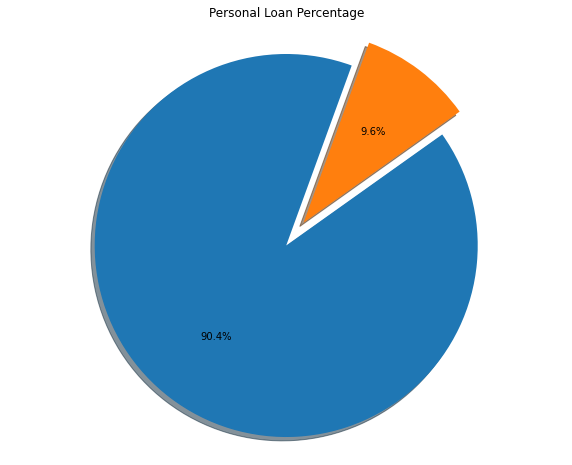

In [24]:
## Univariate Analysis
## 9.6 % of all the applicates get approved for personal loan
tempDF =pd.DataFrame(data["Personal Loan"].value_counts()).reset_index()
tempDF.columns =["Labels","Personal Loan"]
fig1, ax1 = plt.subplots(figsize=(10,8))
explode = (0,0.15)
ax1.pie(tempDF["Personal Loan"], explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal') #Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Personal Loan Percentage")
plt.show()

**3.6)Bivariate analysis**

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

Bivariate analysis can be helpful in testing simple hypotheses of association. Bivariate analysis can help determine to what extent it becomes easier to know and predict a value for one variable (possibly a dependent variable) if we know the value of the other variable (possibly the independent variable) (see also correlation and simple linear regression).

Bivariate analysis can be contrasted with univariate analysis in which only one variable is analysed. Like univariate analysis, bivariate analysis can be descriptive or inferential. It is the analysis of the relationship between the two variables. Bivariate analysis is a simple (two variable) special case of multivariate analysis (where multiple relations between multiple variables are examined simultaneously)

***

**Categorical Independent Variable vs Target Variable**

Bivariate Analysis
Categorical Variables



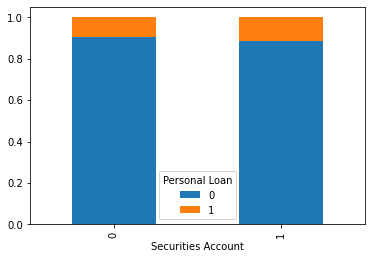

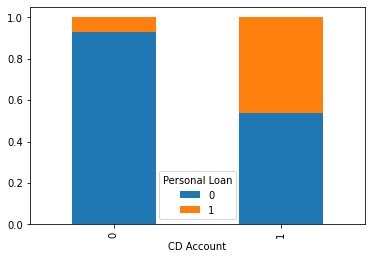

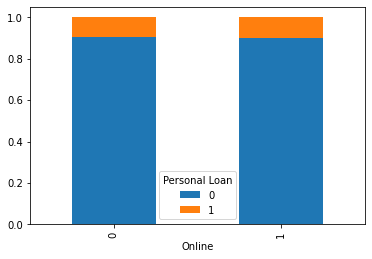

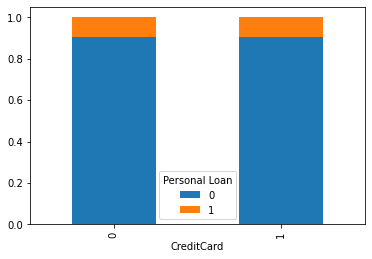

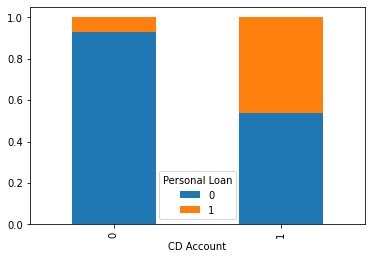

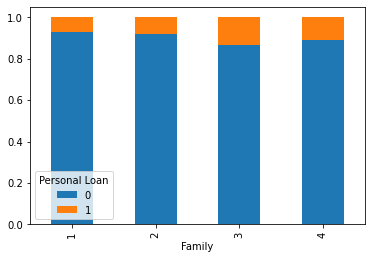

In [25]:
print("Bivariate Analysis")
print("Categorical Variables")
print()

SecuritiesAccount=pd.crosstab(data['Securities Account'],data['Personal Loan']) 
SecuritiesAccount.div(SecuritiesAccount.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

CDAccount=pd.crosstab(data['CD Account'],data['Personal Loan']) 
CDAccount.div(CDAccount.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Online=pd.crosstab(data['Online'],data['Personal Loan']) 
Online.div(Online.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

CreditCard=pd.crosstab(data['CreditCard'],data['Personal Loan']) 
CreditCard.div(CreditCard.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

CDAccount=pd.crosstab(data['CD Account'],data['Personal Loan']) 
CDAccount.div(CDAccount.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Family=pd.crosstab(data['Family'],data['Personal Loan']) 
Family.div(Family.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Bivariate Analysis
Numerical Variables



Text(0, 0.5, 'Percentage')

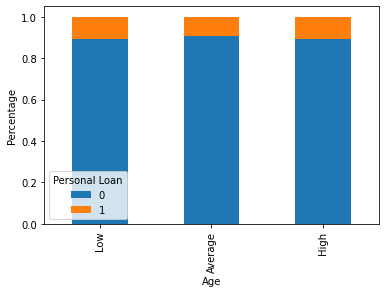

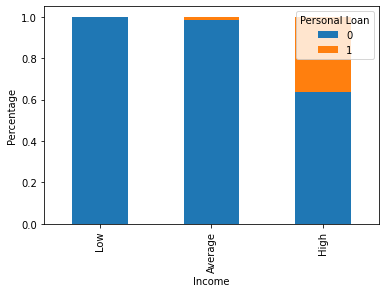

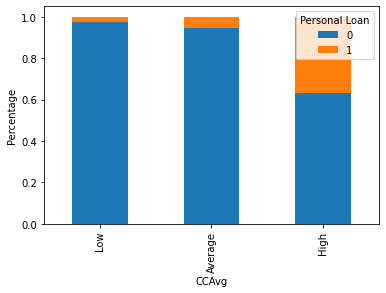

In [26]:
print("Bivariate Analysis")
print("Numerical Variables")
print()

bins=[0,30,60,90] 
group=['Low','Average','High'] 
data['Age_bin']=pd.cut(data['Age'],bins,labels=group)
Age_bin=pd.crosstab(data['Age_bin'],data['Personal Loan']) 
Age_bin.div(Age_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Age')
plt.ylabel('Percentage')

bins=[0,40,100,300] 
group=['Low','Average','High'] 
data['Income_bin']=pd.cut(data['Income'],bins,labels=group)
Income_bin=pd.crosstab(data['Income_bin'],data['Personal Loan']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Income')
plt.ylabel('Percentage')

bins=[0,1,3,10] 
group=['Low','Average','High'] 
data['CCAvg_bin']=pd.cut(data['CCAvg'],bins,labels=group)
CCAvg_bin=pd.crosstab(data['CCAvg_bin'],data['Personal Loan']) 
CCAvg_bin.div(CCAvg_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CCAvg')
plt.ylabel('Percentage')

**Multivariate analysis**



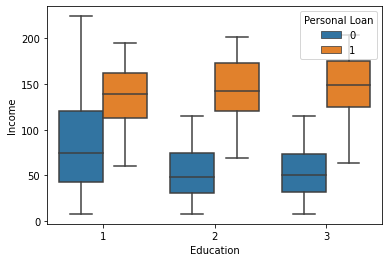

In [29]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data);

Customers with education level=1 have more income.It seems that customers with more income are granted loan across each educational level

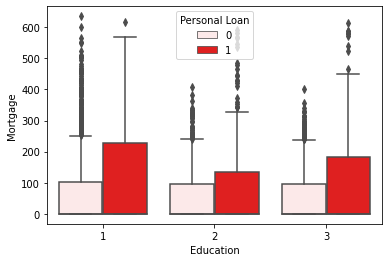

In [30]:
sns.boxplot(x='Education',y='Mortgage',hue='Personal Loan',data=data,color='red');

From the chart it seems that customers with or without personal loans have high mortgage. 

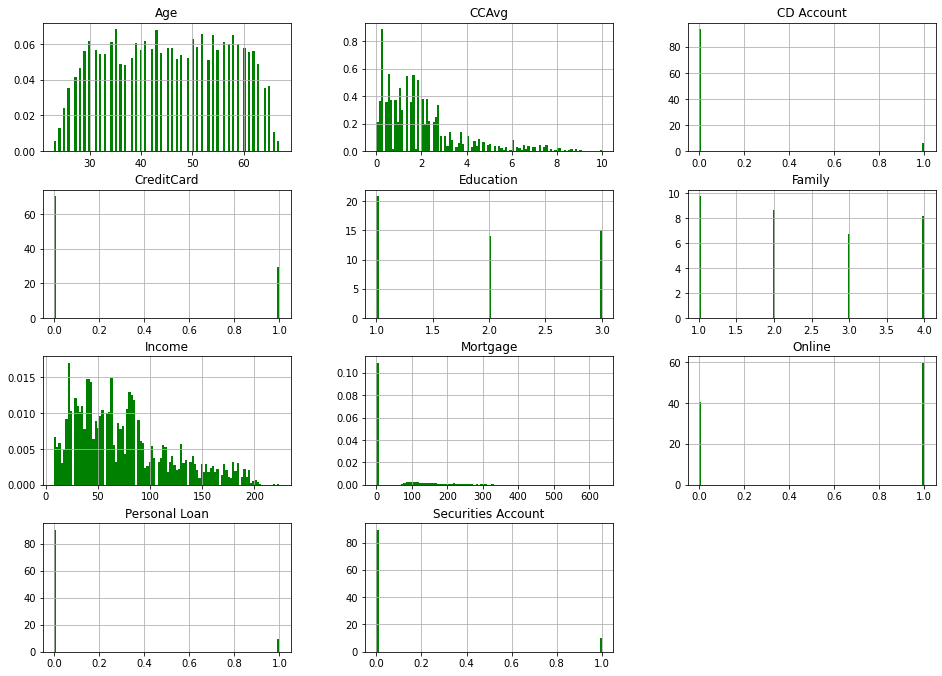

In [31]:
columns=list(data)
data[columns].hist(stacked=True,density=True, bins=100,color='Green', figsize=(16,30), layout=(10,3));

**Inference from histogram :**

Age seems to have symmetric distribution Income & CC Average is right skewed distributionWe have more Undergraduates than Graduate andAdvanced & Professional 60% of customers have enabled online banking and went digital

**Lets check up the account holders distribution.**

In [32]:
def SD_CD(row):
  if (row['Securities Account']==1) & (row['CD Account']==1):
    return"Holds Securities & deposit"
  elif (row['Securities Account']==0) & (row['CD Account']==0):
    return"Does not hold any securities or deposit"
  elif (row['Securities Account']==1) & (row['CD Account']==0):
    return"Holds only Securities Account"
  elif (row['Securities Account']==0) & (row['CD Account']==1):
    return"Holds only deposit"

In [33]:
data['Account_Holder_Category']=data.apply(SD_CD,axis=1)

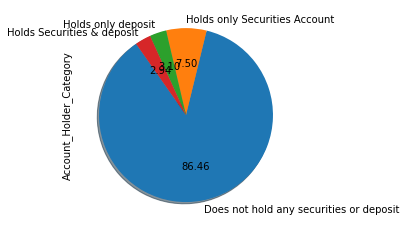

In [34]:
data['Account_Holder_Category'].value_counts().plot.pie(shadow=True, startangle=125,autopct='%.2f')

In [35]:
data=data.drop(['Account_Holder_Category'],axis=1)

In [36]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age_bin,Income_bin,CCAvg_bin
0,25,49,4,1.6,1,0,0,1,0,0,0,Low,Average,Average
1,45,34,3,1.5,1,0,0,1,0,0,0,Average,Low,Average
2,39,11,1,1.0,1,0,0,0,0,0,0,Average,Low,Low
3,35,100,1,2.7,2,0,0,0,0,0,0,Average,Average,Average
4,35,45,4,1.0,2,0,0,0,0,0,1,Average,Average,Low


We could see that almost 86.46% of customers donot hold any securities or deposit and 3% hold both securities as well as deposit.It will be good if we encourage those 86.46% to open any of these account as it will improve the assets of the bank.

**4)Aplying necessary transformations to the feature variables.**

In [37]:
x = data[['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account']]
y = data['Personal Loan'].values

Let us assume x as the independent variables  ('Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account') and 'Personal Loan' as the y feature.

We will add Income and CCAvg in our features after scaling them. WE are scaling them below.


We have found out that we have Income and CCAvg value skewed so we have to transform them.

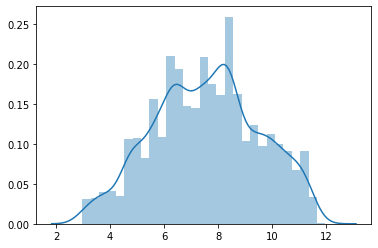

In [38]:
# The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw features apt for downstream estimation.
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['Income'].values.reshape(-1,1))
sns.distplot(pt.transform(x['Income'].values.reshape(-1,1)))

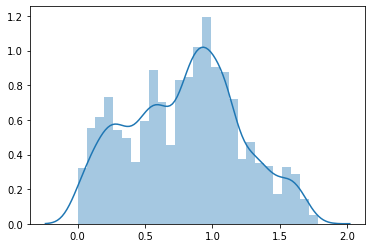

In [39]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['CCAvg'].values.reshape(-1,1))
sns.distplot(pt.transform(x['CCAvg'].values.reshape(-1,1)))

#We drop the previous CCAvg column, as we have a new transformed CCAvg column


Now, CCAvg and Income are transformed. But now we have to transform the mortgage column. We have found that many values are 0 and other are only few

In [40]:
x['MortgageN'] = pd.cut(x['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
x.drop('Mortgage',axis=1,inplace=True)

In [41]:
x.head()

,Age,Income,Family,CCAvg,Online,CreditCard,Education,Securities Account,CD Account,MortgageN
0,25,49,4,1.6,0,0,1,1,0,0
1,45,34,3,1.5,0,0,1,1,0,0
2,39,11,1,1.0,0,0,1,0,0,0
3,35,100,1,2.7,0,0,2,0,0,0
4,35,45,4,1.0,0,1,2,0,0,0


**5)Splitting the data into Training and test set in the ratio 70:30 respectively using stratified sampling**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0,stratify = y)
scx.fit_transform(x_train)
scx.transform(x_test)
#scy.fit_transform(y_train.reshape(-1,1))
#scy.transform(y_test.reshape(-1,1))

array([[-0.97265109,  2.31851937, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [ 0.85873161,  0.16296952, -0.34389746, ...,  2.97177736,
        -0.24878345, -0.47490853],
       [ 0.24827071,  1.18631137, -1.21736706, ...,  2.97177736,
        -0.24878345, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ..., -0.33649896,
        -0.24878345,  0.68340496],
       [-0.97265109, -0.53377386, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [-0.01335539, -0.33781479,  0.52957214, ...,  2.97177736,
        -0.24878345, -0.47490853]])

**6)Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.**

#                       **●LOGISTIC REGRESSION MODEL**

Logistic regressioon measures the relationship between the categorical dependent variable and one or more independent variables by estimating the probabilities using a logistic function,which is the cumulative distribution function of logistic distribution.

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = model.predict(x_test)

In [45]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.accuracy_score(y_train,model.predict(x_train)))

MAE: 0.05533333333333333
R2 score: 0.36240167158308745
0.9446666666666667
0.9494285714285714


In [47]:
## function to get confusion matrix in a proper format
def draw_cm(actual, predicted ):
  cm = confusion_matrix(actual, predicted)
  sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

[[1332   24]
 [  59   85]]


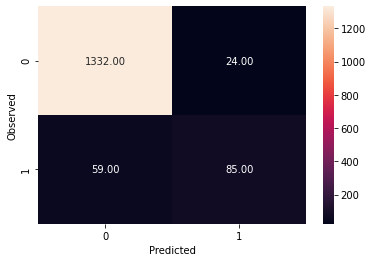

None


In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.78      0.59      0.67       144

    accuracy                           0.94      1500
   macro avg       0.87      0.79      0.82      1500
weighted avg       0.94      0.94      0.94      1500



**8)Build various other classification algorithms and compare their performance**

#**●DECISION TREE MODEL**
Decision tree learning is one of the most predictive modelling approaches used in Statistics,data mining and machine learning.It uses a decision tree to go from observations about an item to conclusions about the item's target value.

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
# Decision Tree 

#from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier() 
clf = clf.fit(x_train,y_train)

In [57]:
import graphviz 
from sklearn import tree 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account'],filled=True, rounded=True) 
graph = graphviz.Source(dot_data)

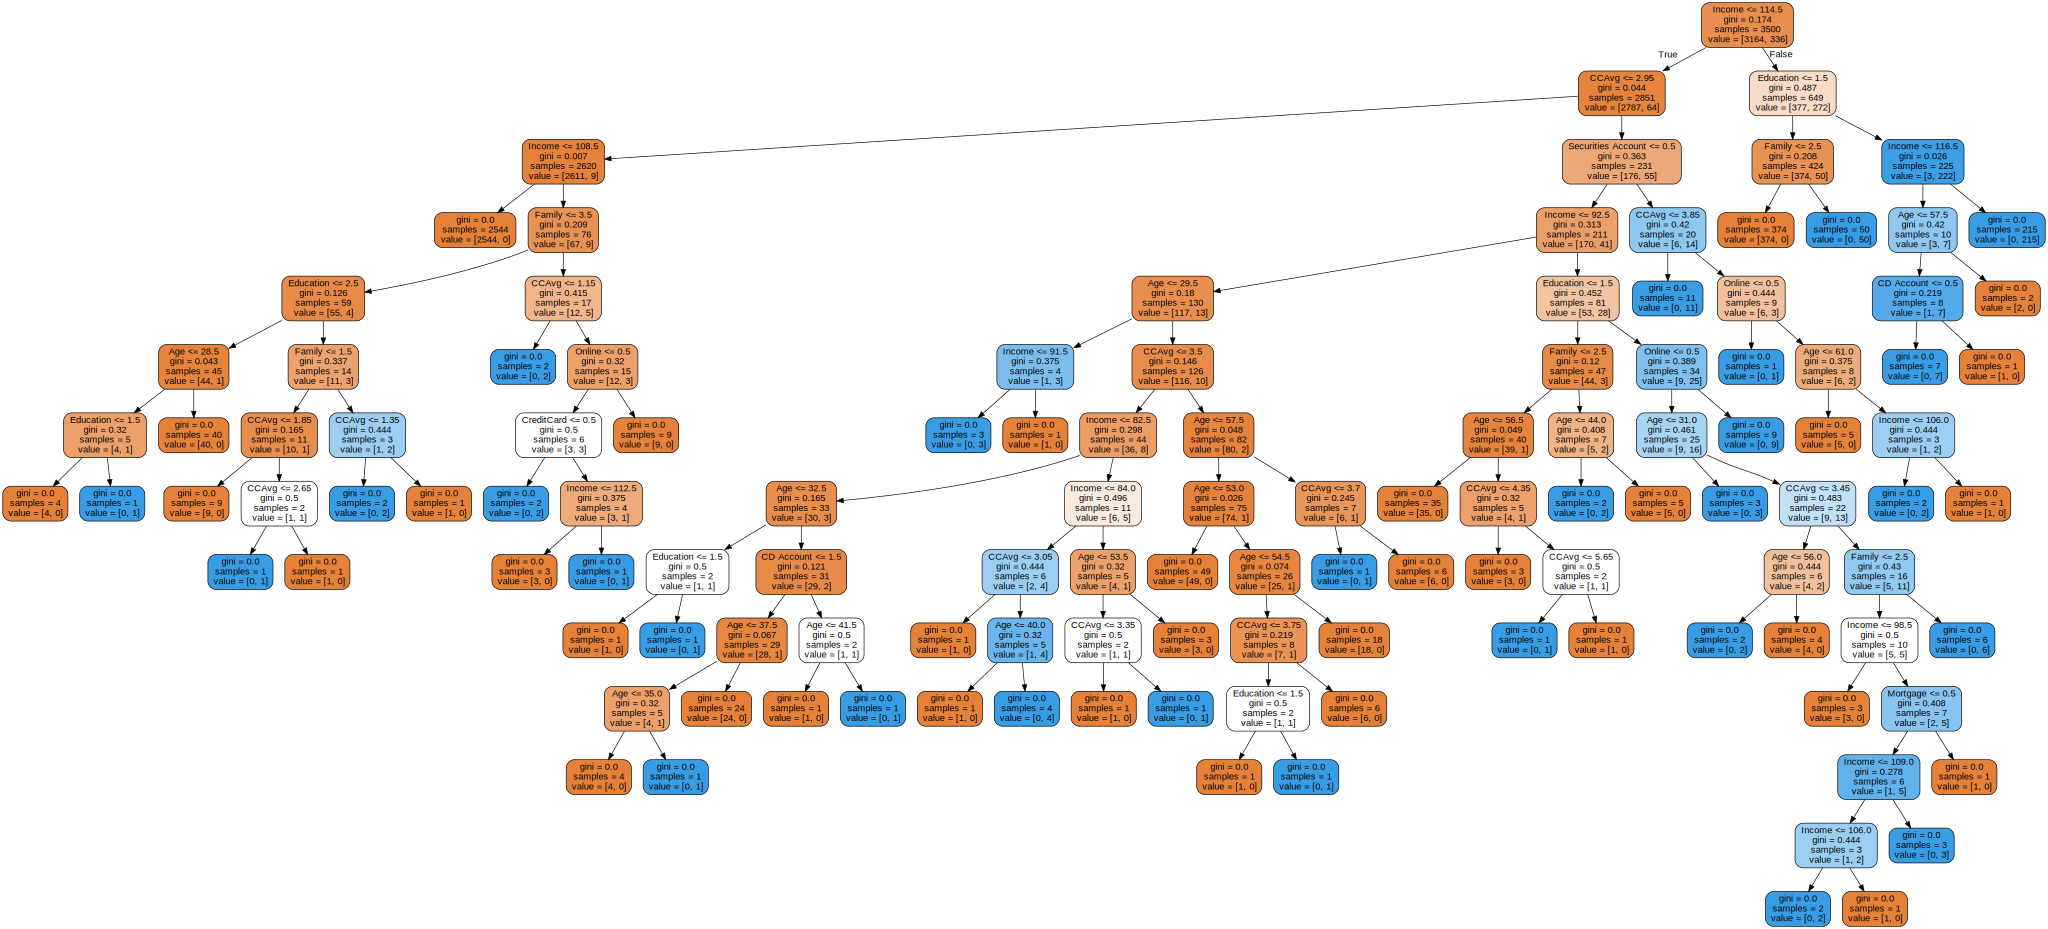

In [58]:
graph

In [59]:
y_pred = clf.predict(x_test)

In [60]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred)) 
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

MAE: 0.018
R2 score: 0.7925884955752212
Accuracy score for test data 0.982
Accuracy score for train data 0.9494285714285714


[[1344   12]
 [  15  129]]


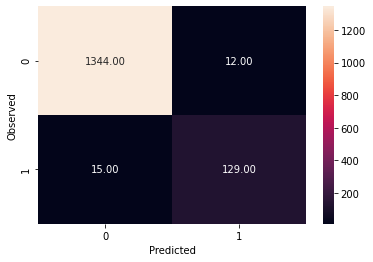

None


In [63]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.90      0.91       144

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



#**●RANDOM FOREST CLASSIFIER**
***
Random forest or random decision forests are an ensemble learning method forclassification,regression,and other tasks that operate by constructing a multitude of decision trees at the training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [67]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier() 
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
y_pred = clf.predict(x_test)

In [71]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.012
R2 score: 0.8617256637168141
Accuracy score for test data 0.988


In [72]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9494285714285714


[[1351    5]
 [  13  131]]


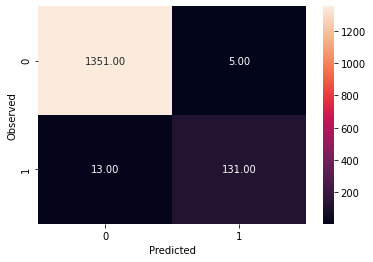

None


In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.91      0.94       144

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



# **●KNN(K -NEAREST NEIGHBOURS) MODEL**
***

In pattern recognition , the k-nearest neighbours algorithm is a non-parametric method proposed by Thomas Cover used for classification and regression.In both cases,the input consists of the k closest training examples in the feature space.

In [84]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=3) 
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [85]:
y_pred = neigh.predict(x_test)

In [86]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

MAE: 0.07266666666666667
R2 score: 0.16267207472959677
Accuracy score for test data 0.9273333333333333
Accuracy score for train data 0.8805714285714286


[[1324   32]
 [  77   67]]


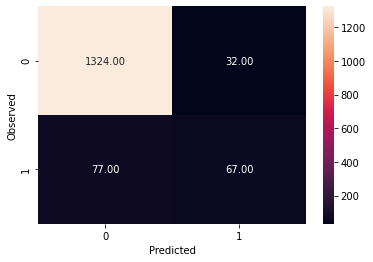

None


In [87]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1356
           1       0.68      0.47      0.55       144

    accuracy                           0.93      1500
   macro avg       0.81      0.72      0.76      1500
weighted avg       0.92      0.93      0.92      1500



#**●NAIVE BAEYES CLASSIFIER MODEL**
***
In statistics, Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models.

In [78]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
y_pred = model.predict(x_test)

In [80]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

MAE: 0.11266666666666666
R2 score: -0.2982423795476894
Accuracy score for test data 0.8873333333333333
Accuracy score for train data 0.8805714285714286


[[1243  113]
 [  56   88]]


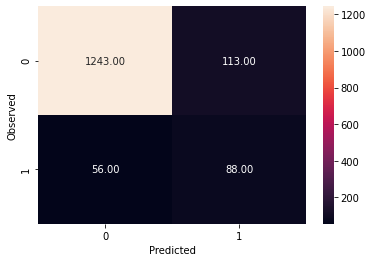

None


In [81]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.44      0.61      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



#**●NEURAL NETWORK**
***
Neural Networks as Classifiers-
A neural network consists of units (neurons), arranged in layers, which convert an input vector into some output. Each unit takes an input, applies a (often nonlinear) function to it and then passes the output on to the next layer.


In [89]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500) 
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [90]:
y_pred = mlp.predict(x_test)

In [91]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("R2 score:",metrics.r2_score(y_test,y_pred)) 
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

MAE: 0.020666666666666667
R2 score: 0.7618608652900688
Accuracy score for test data 0.9793333333333333
Accuracy score for train data 0.8805714285714286


[[1351    5]
 [  26  118]]


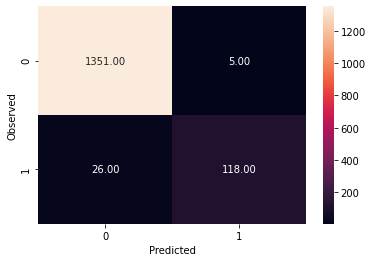

None


In [92]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(draw_cm(y_test,y_pred))

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.96      0.82      0.88       144

    accuracy                           0.98      1500
   macro avg       0.97      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500



#**9)BUSINESS UNDERSTANDING OF THE MODEL**

The bank has a growing customer base. Bank wants to increase borrowers (asset customers) to bring in more loan business and earn more through the interest on loans.

As the bank wants to increase their profits, the liability customers must be changed to the asset customers who buy personal loans.

I have made a model which can predict the likelihood of a liability customer buying the personal loans.

In the beginning, I imported the library files and the dataset provided. Then I just overviewed the data ,so as to know what it is all about.

During the analysis I saw that cleaning is to be done in the ‘Experience’ column as it had some negative values.

I checked some other conditions regarding the dataset, so as to infer more and to get a deeper analysis of the dataset and thus dropped some unwanted columns which were of no use for the target variable.

As analysis is the most important part of any model, so this much analysis was not sufficient for the model, then I started exploratory data analysis in which I checked the unique values, values of particular variables which affect more to the target variable.

Then I plotted graphs of the feature variables, I plotted univariate and bivariate graphs to get some conclusions regarding the dataset.(About levels of education, family members, relation of two variables etc.)

I plotted a heatmap for correlation and a pairplot for more understanding.

Also I got to know about the types of variable present in the dataset when I checked for the unique values and then I did a value count of all the categorical columns present in the dataset.

Then finally I explored all the data and had some insights about that.

So some variables were skewed and some were skewed and discontinuous.

So now the process of data preprocessing started and I transformed the skewed variables using box-cox and yeo-jhonson method and transformed the skewed discontinuous variable by integer encoding(label encoding) also known as binning.

Now the skewed data was more normal and less skewed.

Then I normalized the feature variables using the standard scalar method.
